<a href="https://colab.research.google.com/github/Kasrakko/PyTorch-Deep-Learning/blob/main/NN_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import torch 
from torch import nn
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
torch.__version__

'1.13.1+cu116'

***What we are doing here is:***

1. data (prepare and load)
2. building model
3. fitting the model to data (training)
4. making prediction and evaluting model (inference)
5. saving and loading a model
6. putting it all together

## Data preparing and loading

Data can be anythings 
* Excel sheets 
* Image of any kind
* Audio
* Videos
* Text 
* DNA
* etc

Machin learning is a game oftwo parts:
1. Get data into a numerical representation.
2. Build a model to learn pattern in that numerical representation 

To showcase this, lets create some *known* data using the linear regrrion formula.

### Get data into a numerical representation

In [208]:
# create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Inputs
y = weight * X + bias # Outputs

print(f"this is our X:\n{X.squeeze()}\n\n \t\t\t\t And the len(X)={len(X)}\n And here is the first 10 of X:\n{X[:10]}")
print(f"this is our y:\n{y.squeeze()}\n\n \t\t\t\t And the len(y)={len(y)}\n And here is the first 10 of y:\n{y[:10]}")

this is our X:
tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

 				 And the len(X)=50
 And here is the first 10 of X:
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
this is our y:
tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
        0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
        0.6780, 0.6920, 0.7060, 0.7200, 0.7

### Spliting datasets to training and test sets

In [209]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize data

In [210]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  "\n Plots training data, test data and compares predictions."
  plt.figure(figsize=(10, 7))

#plot trainig data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

# plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

# Are there predictions?
  if predictions is not None:
  # plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
    plt.legend(prop={"size" : 14});

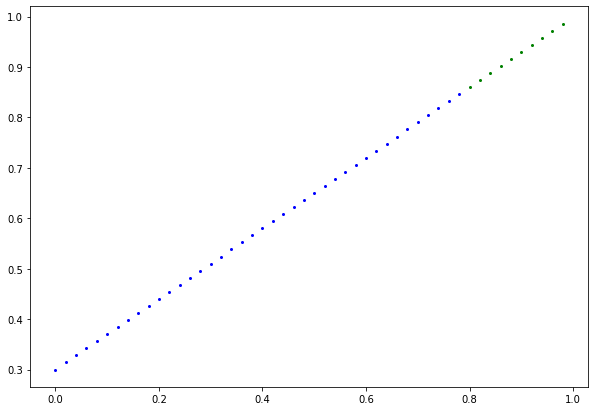

In [211]:
plot_predictions();

In [212]:
# Build model
# Create a linear regrresion model
class LinearReggresionModel(nn.Module): # Almost everything in Pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # Starts with random weight and try to adjust it to the ideal weight     
                                          dtype=torch.float)#pyTorch loves the data typpe torch.float32
                                          ,requires_grad=True) # Can this parameter update via gradiant descent
    self.bias = nn.Parameter(torch.randn(1, # Starts with random weight and try to adjust it to the ideal weight     
                                          dtype=torch.float)#pyTorch loves the data typpe torch.float32
                                          ,requires_grad=True) # Can this parameter update via gradiant descent
  
  # Forward methde
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is input data
    return self.weights * x + self.bias # Linear regrression formula

### pyTorch model building essentials

* `nn.module` -> contains all the building for computational graph

* `torch.nn.parameter` -> what parameter should our model try and learn, often a pytorch layer from torch.nn

* `torch.nn.module`-> the class for all NN modules, if subclass it, you should overwrite forward()

* `torch.optim` -> this where the optimizer in pyTorch live, they will helps with gradient descent 

* `def forward()` -> All nn.modules subclases require you to overwrite forward(), this method defines what happens in the forward computation

 ### Checking the contests of our pyTorch model

In [213]:
# Create a random seed
torch.manual_seed(42)
#  Create an instance of the model ( this is a subclass of nn.Module)

model_0 = LinearReggresionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [214]:
# List named 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inferenece_mode()`

To checkout model predictive model, lets see how well it predicts `y_test` based on `X_test`.

when we pass data through our model, its going to run it through `forward()` method. 

In [225]:
# Make prediction with model without infernrce_mode
y_preds = model_0(X_test)
y_preds, len(y_preds)

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]], grad_fn=<AddBackward0>), 10)

In [224]:
# Make prediction with model with infrence_mode
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

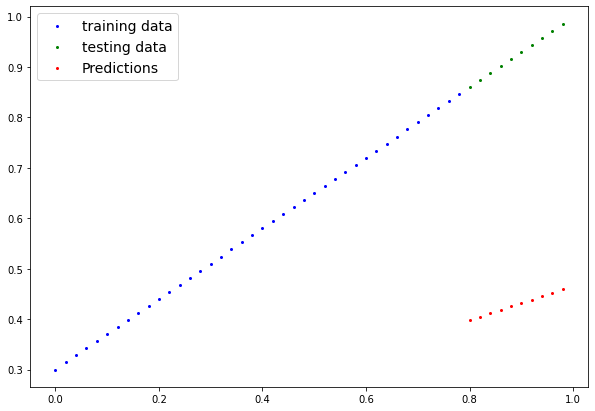

In [219]:
plot_predictions(predictions=y_preds)

### Train model 

Te whole idea of training is for a model to move from some **unknown** parameters (these may be random) to some **known** parameters.

Or in the other word from poor representation of the data to better representation.

One way to messure how poor or how wrong your model oredicts is to use loss function.

THINGS WE NEED TO TRAIN:
* **Loss finction:**  A function to messure how wrong your models oredictions are to the ideal outputs, lower is better.

* **Optimizer:** Take into account the loss of the model and adjust the model's parameters.

And specifically for pyTorch:
* A train loop
* A test loop